<a href="https://colab.research.google.com/github/vinithaudaiyar/Codsoft-data-science-Internship/blob/main/IRIS_flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : vinitha Udaiyar

Domain : Data science

Aim:To Develope a model that can classify  iris flowers into different species based on their sepal and petal measurements.


In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fdata=sns.load_dataset('iris')
fdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
fdata['species'],cat=pd.factorize(fdata['species'])
fdata.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
fdata.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
fdata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:

cols=['sepal_length','sepal_width','petal_length','petal_width']
fdata.rename(columns={cols[0]:0,cols[1]:1,cols[2]:2,cols[3]:3},inplace=True)
fdata.loc[::50]

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [12]:
print(fdata.shape)
fdata.describe()

(150, 5)


,0,1,2,3,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

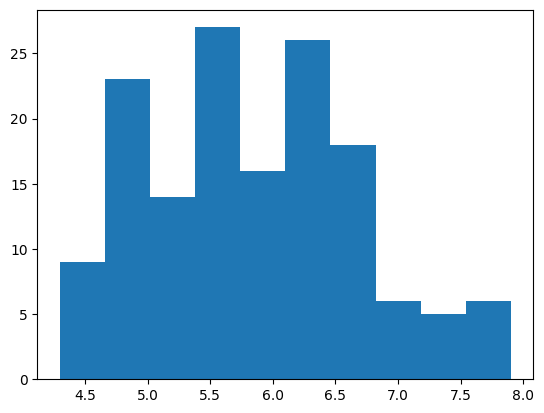

In [14]:
plt.hist(fdata[0])

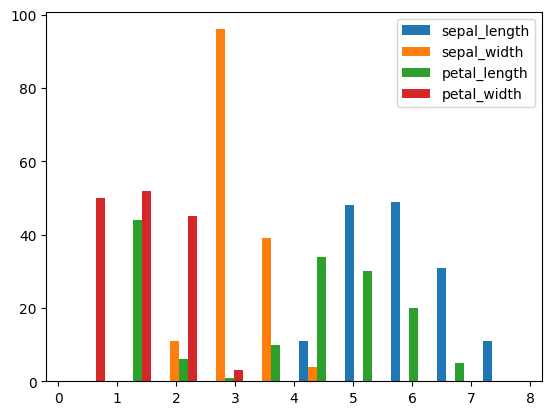

In [16]:
plt.hist([fdata[0],fdata[1] ,fdata[2],fdata[3]],label=[cols[0],cols[1],cols[2],cols[3]])
plt.legend() #name

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

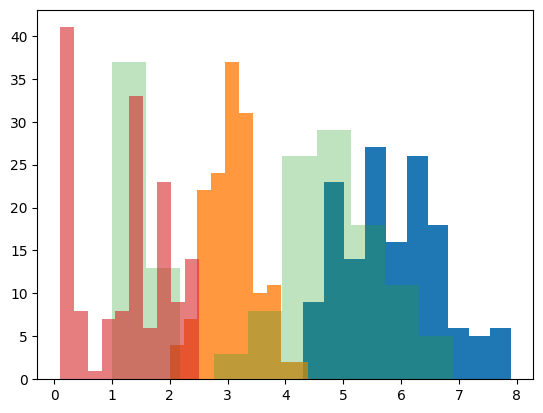

In [18]:
plt.hist(fdata[0])
plt.hist(fdata[1], alpha=0.8)
plt.hist(fdata[2], alpha=0.3)
plt.hist(fdata[3], alpha=0.6)


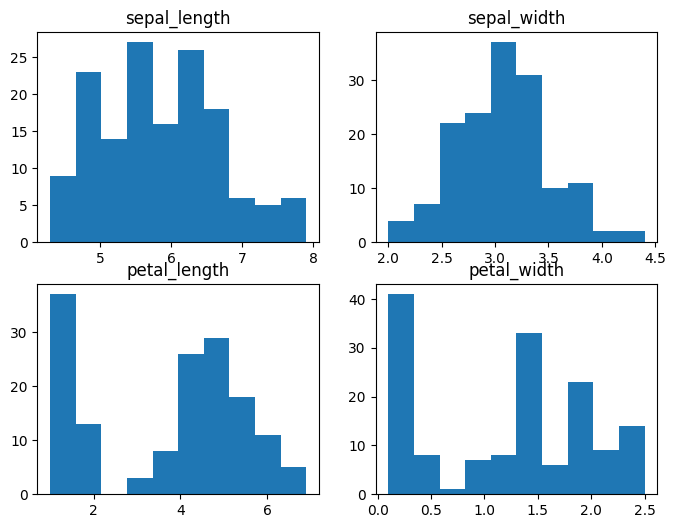

In [19]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(fdata[0])
ax[0,1].hist(fdata[1])
ax[1,0].hist(fdata[2])
ax[1,1].hist(fdata[3])
ax[0,0].set_title(cols[0])
ax[0,1].set_title(cols[1])
ax[1,0].set_title(cols[2])
ax[1,1].set_title(cols[3])
plt.show()


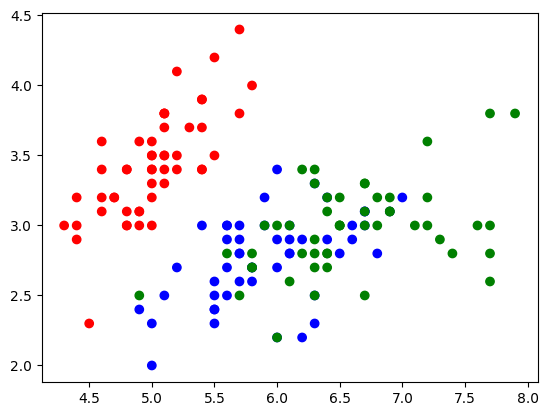

In [28]:
colors={0:'red',1:'blue',2:'green'}
plt.scatter(fdata[0],fdata[1],c=fdata['species'].map(colors))

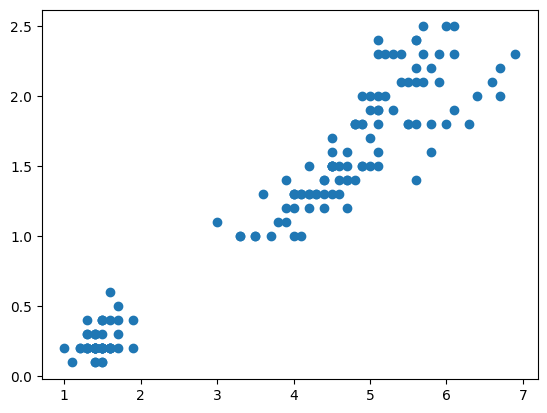

In [26]:
colors={'0':'red','1':'blue','2':'green'}
plt.scatter(fdata[2],fdata[3])

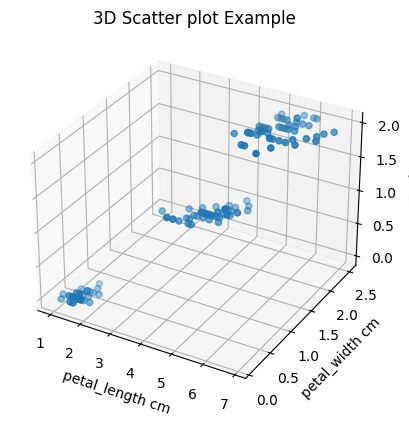

In [37]:


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(fdata[2],fdata[3],fdata.species)
ax.set_xlabel('petal_length cm')
ax.set_ylabel('petal_width cm')
ax.set_zlabel('specise')
plt.title('3D Scatter plot Example')
plt.show()


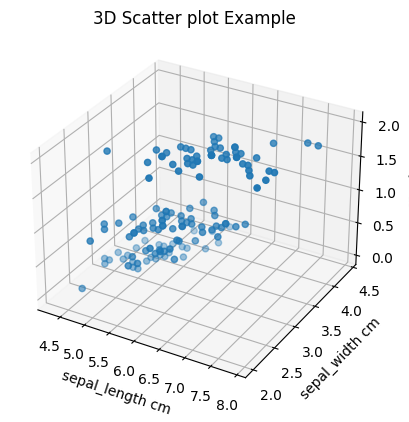

In [39]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(fdata[0],fdata[1],fdata.species)
ax.set_xlabel('sepal_length cm')
ax.set_ylabel('sepal_width cm')
ax.set_zlabel('specise')
plt.title('3D Scatter plot Example')
plt.show()

In [44]:
k=range(1,10)
sse=[]

for i in k:
  km = KMeans(n_clusters=i)
  km.fit(fdata[[2,3]])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [45]:
sse


[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.48300089968511,
 13.916908757908757,
 11.057257664362929,
 9.209557208237984,
 7.615402244955952,
 6.480259206692711]

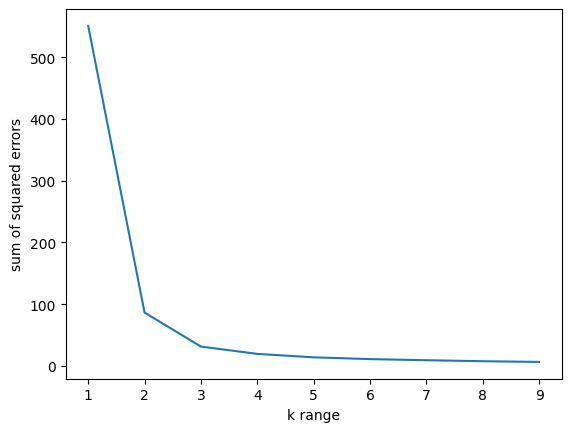

In [49]:
plt.xlabel('k range')
plt.ylabel('sum of squared errors')
plt.plot(k,sse)

In [50]:
km= KMeans(n_clusters=3,random_state=0)
y_predict = km.fit_predict(fdata[[2,3]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
fdata['cluster']=y_predict
fdata.head(200)

,0,1,2,3,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [53]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(fdata.species,fdata.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

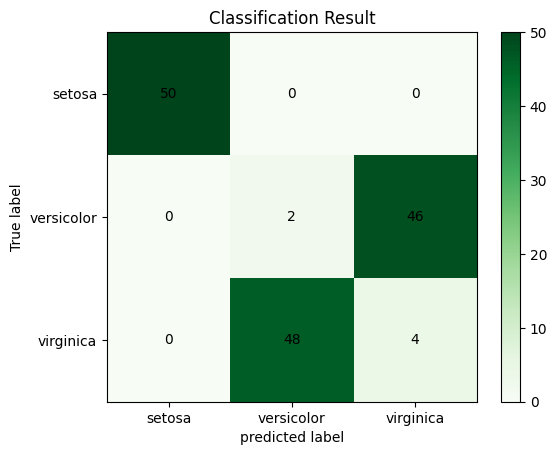

In [56]:
labels=fdata.species
predict=fdata.cluster

cm=confusion_matrix(labels,predict)
class_label = ['setosa','versicolor','virginica']

plt.imshow(cm,interpolation = 'nearest',cmap=plt.cm.Greens)
plt.title('Classification Result')
plt.colorbar()
tick_marks = np.arange(len(class_label))
plt.xticks(tick_marks,class_label)
plt.yticks(tick_marks,class_label)

for j in range(len(class_label)):
  for m in range(len(class_label)):
    plt.text(j,m,str(cm[j][m]),ha='center',va='center',color='black')


plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()




